In [10]:
from fastai.vision import *
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
img, label = data.train_ds[0]
print(label)
img

3


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-03
Min loss divided by 10: 3.02E-02


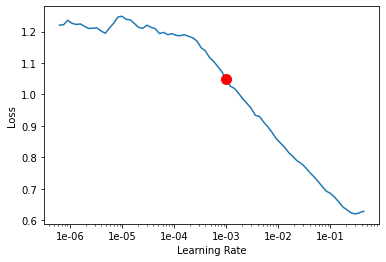

In [11]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
lr = learn.recorder.min_grad_lr
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.159056,0.085186,0.973503,00:06


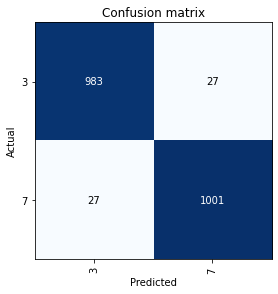

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
from fastai.text import *
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 1.00E-02


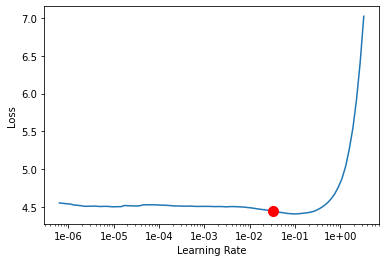

In [16]:
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32) 
learn =language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
lr = learn.recorder.min_grad_lr
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.464152,4.025169,0.276756,00:12
